# **Modern Theory of Detection and Estimation**
## **Lab 3. Linear filtering for active noise cancellation**
### **Academic Year 2022/2023** 

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66 and 69)
*   Telecomunication Technologies Engineering (groups 91, 92 and 95)
*   Telematic Engineering (groups 71 and 79)

Department of Signal Processing and Communications.


## **Students information**

**Surname(s) and name(s):**

Rodrigo De Lama Fernández

Jaime Mato Rodriguez

**Group:**

95

**Date:**

December 2022

## **Logistics**

**Due Date**: 

This assignment **is due by 11:59 pm** on **January 1, 2023**. 


**Maximum number of students**: 

Work on this assignment in **groups of maximum 3 people**. One member of the group needs to upload the Notebook solution to Aula Global. Write full names of all people in the group on the submitted Notebook.


**Setup Instructions:**

Open Google Colab and upload the notebook ("TMDE_Lab3_student.ipynb"). You will find it at Aula Global (in the master group). Sometimes it will take a minute or so for a new Jupyter server to start up on your behalf. Once it does, you are ready to start! 

In the notebook you will see clearly where you need to add code for your programming homework or to write an answer to a question.


**Submitting the solution for the Jupyter Notebook**

For Notebook submission, a student of the group will be uploading a copy of the Notebook file through Aula Global. He/she may submit as many times as he/she likes before the submission deadline, and we will use the latest submission for grading. 

**Late submission policy**

If a **submission is one day late**, the **final grade on it will reflect a 20% late submission reduction** (for all the members in the group). If a submission is **two days late**, the deduction will be **40% and so on.**

In [62]:
#Some libraries...
from IPython.core.display import Image, display
from IPython.display import Audio
from scipy.io import wavfile


# **1. Noise cancellation scenario**

##1.1 Description of the active noise cancellation

In this lab assignment, we will simulate an airplane cockpit working environment, in which a strong background noise is always present resulting in lack of good communication between the cockpit and the cabin crew or the flight attendants.

There are three different signals:
1. The pilot's voice: $s[n]$
2. Two different sources of background noise: $s_\text{ne1}[n]$ and $s_\text{ne2}[n]$. 

And three different microphones: 
1. The main mic which captures the pilot's voice as well as both components of background noise.
2. Two secondary mics that are allocated on two different places in the airplane. They only capture the background noises.

Let's assume that every background noise source goes through a different channel to reach each microphone.
1. At the main mic, $v_1[n]$ and $v_2[n]$ are the background noise signals after they cross their respective channels.
2. At secondary mic #1, $v_{11}[n]$ and $v_{21}[n]$ are the background noise signals after they cross their respective channels.
3. At secondary mic #2, $v_{12}[n]$ and $v_{22}[n]$ are the background noise signals after they cross their respective channels.

Let's also assume that:
1. The pilot's voice and the noise sources are incorrelated.
2. The signals originated by the first background noise ($v_1[n]$, $v_{11}[n]$ and $v_{12}[n]$) are correlated among them.
2. The signals originated by the second background noise ($v_2[n]$, $v_{21}[n]$ and $v_{22}[n]$) are correlated among them.

The **basic idea underlying this assignment** is to **use a Wiener filter to eliminate the additive background noise**. In this scenario, the **input signal** to the filter is the **noise at the secondary mics** ($x_1[n]$ and $x_2[n]$) and the **reference signal** (desired signal) is the output of the main mic (**the sum of the target signal** $s[n]$ **and the interferences $v_1[n]$ and $v_2[n])$**.

See the figure shown below for further details. Please note that in the figure, $\text{ns}1[n]$ represents the aformentioned signal $s_\text{ne1}[n]$, whereas $\text{ns}2[n]$ denotes $s_\text{ne2}[n]$.

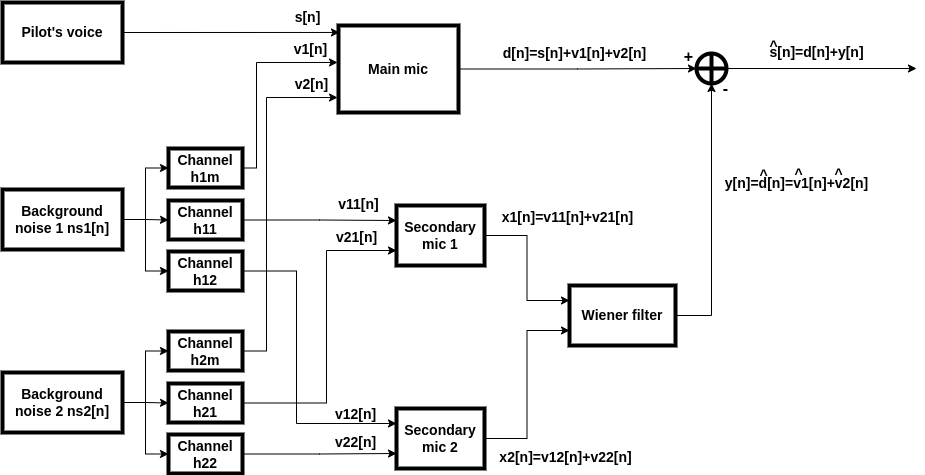

Since the input signal of the Wiener filter is only correlated with the noise component of the reference signal, the filter will be only able to create a good approximation of this noise components in the main mic $(y[n]= \widehat{d}[n]=\widehat{v}_1[n]+\widehat{v}_2[n])$. Therefore, the error signal of the filter will be an approximation to the pilot voice $(\widehat{s}[n])$.

## 1.2 Measure of performance

For a finite signal $x[n]$ with a duration of $N$ samples times, the average instant power can be computed as follows:
$$
x[n] \longrightarrow P_x = \frac{1}{N}\sum_{i=1}^{N}{x^2[i]}
$$

If the signal $x[n]$ is the error signal, the average instant power can be seen as the mean squared error (MSE).

In this assessment, in order to measure performance and evaluate results, we will compute the average instant power of the diference between the original signal and its reconstruction. As we will see later, this original signal will be composed of the noises in the pilot's mic $(v_1[n]$ + $v_2[n])$ and the reconstructed signal will be the output of the Wiener filter $(\widehat{v}_1[n]$ + $\widehat{v}_2[n])$.

## 1.3 Signals involved

### 1.3.1 Voice

The pilot's voice: to simplify the problem, we will use a single sinusoid (pure tone) lasting 2 seconds (more realistic signals, such as an actual voice clip, could also be used). Let's assume a sampling frequency of 8.000 Hz and a frequency of 20 Hz.

In [63]:
import matplotlib.pyplot as plot
import numpy as np
import math

# The step will be 1/sampling_freq
# step = 1/8000
# n is "time" (discrete) from 0 to 2 seconds
n = np.arange(0, 2, 0.000125);
# print(n) # an array between 0 and 2s with 0.000125 between each step
# print(len(n)) # 16000 data positions

# w = 20
# pilots voice signal
# s = sin(w*2pi*time)
s = np.sin(20*2*math.pi*n);


Plot the pilot's voice over time (in seconds). Indicate in the figure what both y-axis and x-axis represent.


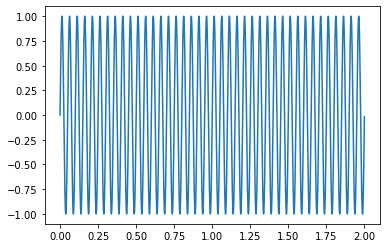

In [64]:
plot.plot(n, s)


### 1.3.2 Noise background sources

In particular, we will start by obtaining $s_\text{ne1}[n]$ and $s_\text{ne2}[n]$ to be random samples from a standard normal distribution (with the same duration in seconds as the pilot's voice). The amplitude of both noises are multiplied by $2$.

In [65]:
Sne1 = 2 * np.random.normal(0, 1, len(n)) # the size parameter inpùt is the length of the signal "len(t)"
Sne2 = 2 * np.random.normal(0, 1, len(n))


Plot both background noise signals over time (in seconds). Please, indicate in the figure what both y-axis and x-axis represent.

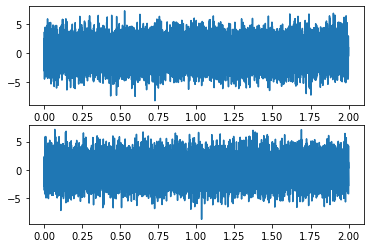

In [66]:
# MATLAB like code
figure, axis = plot.subplots(2)

axis[0].plot(n, Sne1)
axis[1].plot(n, Sne2)


### 1.3.3 Signal at main mic

To reach the main mic, the background noise signals must go through channels with the following impulse response:

$$
h_{1}[n] = 0.2\cdot e^{-n / 0.05}
$$

$$
h_{2}[n] = 0.1\cdot e^{-n / 0.01}
$$

With this scenario in mind, the noise components at the main mic can be calculated as follows:

$$
v_{1}[n] = h_{1} \ast  s_{\text{ne}_{1}}[n]
$$
$$
v_{2}[n] = h_{2} \ast  s_{\text{ne}_{2}}[n]
$$

where the symbol $\ast $ denotes the convolution.


Finally, the pilot's microphone noises must be added to the pilot's voice to obtain the main (pilot) mic's output signal.

$$
d[n] = s[n] + v_1[n]+ v_{2}[n]
$$

Plot the two noise signals $(v_1[n]$ and $v_2[n])$ and the complete input in the pilot's microphone $(d[n])$.

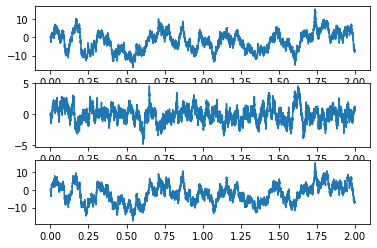

In [67]:
# impulse responses
h1 = 0.2 * np.exp(-n/0.05)
h2 = 0.1 * np.exp(-n/0.01)

# we convolve and then limit the resulting signal between 0 and 2 seconds, 0 to 16000 samples, 1 every 0.000125 second
v1 = np.convolve(h1, Sne1) # convolve is the np function for a convolution
v1 = v1[0:len(n)] # len(n) will be 16000

v2 = np.convolve(h2, Sne2)
v2 = v2[0:len(n)]

d = s + v1 + v2 # resulting in a signal composed of the sum of each value at each point of the signal added together

figure, axis = plot.subplots(3)
axis[0].plot(n, v1) # noise signal 1
axis[1].plot(n, v2) # noise signal 2
axis[2].plot(n, d) # pilots mic output signal


Having a look at the figures that you have obtained, do you think there is a source noise that affects "more" the pilot's voice?

<font color = 'blue'> The signal that seems to affect the pilots voice the most is v2

### 1.3.4 Signal at secondary mic 1

To reach the secondary mic #1, the background noise signals must go through channels with the following impulse response:

$$
h_{11}[n] = 0.5 \cdot e^{-n / 0.005}
$$

$$
h_{21}[n] = 0.2 \cdot e^{-n / 0.001}
$$

The noise components at mic #1 can be calculated as follows:

$$
v_{11}[n] = h_{11} * s_{\text{ne}_{1}}[n]
$$

$$
v_{21}[n] = h_{21} * s_{\text{ne}_{2}}[n]
$$

where the symbol $\ast $ denotes the convolution.

Plot the signal at secondary mic #1 $\big(x_1[n] = v_{11}[n] + v_{21}[n]\big)$.

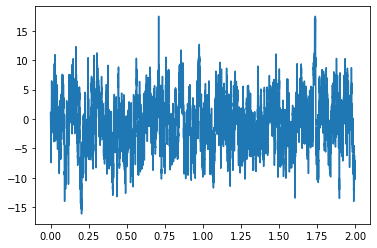

In [68]:
h11 = 0.5 * np.exp(-n/0.005) # impulse responses
h21 = 0.2 * np.exp(-n/0.001)

v11 = np.convolve(h11, Sne1) # convolution
v11 = v11[0:len(n)] # delimiting

v21 = np.convolve(h21, Sne2)
v21 = v21[0:len(n)]

x1 = v11 + v21

plot.plot(n, x1)


### 1.3.5 Signal at secondary mic 2

To reach the secondary mic #2, the background noise signals must go through channels with the following impulse response:

$$
h_{12}[n] = 0.3 \cdot e^{-n / 0.001}
$$

$$
h_{22}[n] = 0.1 \cdot e^{-n / 0.001}
$$

The noise components at the secodary mic #2 can be calculated as follows:

$$
v_{12}[n] = h_{12} * s_{\text{ne}_{1}}
$$

$$
v_{22}[n] = h_{22} * s_{\text{ne}_{2}}
$$

where the symbol $\ast $ denotes the convolution.

Plot the signal at secondary mic #2 $\big(x_2[n] = v_{12}[n] + v_{22}[n]\big)$.

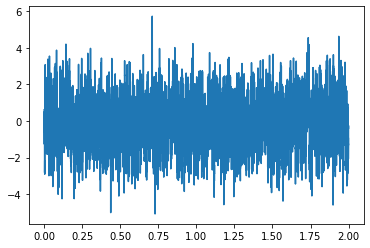

In [69]:
h12 = 0.3 * np.exp(-n/0.001) # impulse responses
h22 = 0.1 * np.exp(-n/0.001)

v12 = np.convolve(h12, Sne1) # convolving
v12 = v12[0:len(n)] # delimiting

v22 = np.convolve(h22, Sne2)
v22 = v22[0:len(n)]

x2 = v12 + v22

plot.plot(n, x2)


## 1.4. Filters

Build a function that receives the input ($x[n]$), the output ($d[n]$), the filter order ($M$) and returns a dataset in the matrix format shown below:


$$X=\begin{bmatrix}
  x[M-1] & x[M-2] & ... & x[1] & x[0]\\ 
  x[M] & x[M-1] & ... & x[2] & x[1]\\ 
  x[M+1] & x[M] & ... & x[3] & x[2]\\
  ...&...  &...  &...  & ... \\ 
  x[2M-1] & x[2M-2] & ... & x[M+1] & x[M]\\
\end{bmatrix} \,\,\,\, D=\begin{bmatrix}
  d[M-1]\\ 
  d[M]\\  
  d[M+1]\\
  ... \\ 
  d[2M-1] 
\end{bmatrix}$$


$\underline{\text{Hint}}$: Function [toeplitz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.toeplitz.html) in `scipy.linalg` could be useful to calculate matrix $X$.


In [70]:
from scipy.linalg import toeplitz

# M is the filter order
# X (big x) is the computed result matrix
# x (small x) is the input matrix to operate with

def my_matrices(x, d, M):
  N = len(x) # for sizes of the X output matrix
  # print("N:", N)

  Nr = N - M + 1
  # print("Nr:", Nr)
  
  #<SOL>
  
  X = np.zeros((Nr, M)) # parenthesis bc theres only 1 arg, the tuple indicating the dimensions of the zeroes matrix
  # print("Zeros matrix:", X)

  X = toeplitz(x)[M-1: , :M]
  # of [M-1: , :M]
  # M-1: gets rid of all previous rows to row M
  # the comma separates rows and collumns
  # :M gets rid of all collumns past entry M
  # print("X:", X)

  D = d[M-1:] # new d will be from position M-1 until the end (deleting the front)
  # print("d:", d)

  #<\SOL>
  
  return X, D # returns a tuple of two arrays


So as an example, if we have:

$$x=[1, 2, 3, 4, 5, 6, 7, 8, 9,10]$$

$$d=[0, 1, 0, 1, 0, 1, 1, 1, 0, 0]$$

and $M=5$, the output would be:

$$\begin{equation}
M=\begin{bmatrix}
5 & 4 & 3 & 2 & 1\\
6 & 5 & 4 & 3 & 2\\
7 & 6 & 5 & 4 & 3\\
8 & 7 & 6 & 5 & 4\\
9 & 8 & 7 & 6 & 5\\
10 & 9 & 8 & 7 & 6\\
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
D=\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0\\
\end{bmatrix}
\end{equation}$$


Try it yourself!!

In [71]:
# EXAMPLE to test my_matrices method

x_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

d_test = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0]

M_test = 5

my_matrices(x, d_test, M)


(array([[ 5,  4,  3,  2,  1],
        [ 6,  5,  4,  3,  2],
        [ 7,  6,  5,  4,  3],
        [ 8,  7,  6,  5,  4],
        [ 9,  8,  7,  6,  5],
        [10,  9,  8,  7,  6]]), [0, 1, 1, 1, 0, 0])


By using the FIR filter shown below, the output ($y[n]$) is obtained as a function of the present values in the input signals ($x_1[n]$ and $x_2[n]$), as well as their last $M-1$ last values. Please note that $M$ represents the order of the filter ($M$ time instants):

$${y}[n] = \sum_{m=0}^{M-1}{w}[m]{x_1[n-m]} + \sum_{m=0}^{M-1}{w}[m+M]{x_2[n-m]}$$

This is equivalent to the linear model studied for regression tasks, where the output is obtained as a linear combination of input observations.

In this sense, it is feasible to build a dataset where the objective signal is the output of the filter and the $M$ features are the last $M$ values of the input signal.

$\underline{\text{Note}}$: It is important to remark here that the number of coefficients calculated for the linear filter is $2M$.

## 1.5. Compute the correlation between signals

### 1.5.1. Check correlations

One of the main premises of the Wiener filter relies on the assumption that the two noise components are correlated and the original signal (the pilot's voice) is incorrelated with both noise components. Let's analyse the correlation between signals to verify that we can apply this kind of filter to our problem.




### 1.5.2. Construct a function that computes the correlation of two signals up to $M$ time instants

The first thing we need to do is to implement a new function (`my_sample_correlation`) that computes the correlation between two signals over a period of time. To do so, we will define a sliding window that calculates the correlation as follows:
$${r}[n] =  d[n] \ast x[n] = \frac{1}{N_r} \sum_{m=0}^{M-1}{d}[m]{x[n-m]}$$
where $N_r$ is the number of samples to be used in the calculation of correlation.

$\underline{\text{Hint}}$: You can use matrix properties to calculate the correlation using a matrix product.

In [72]:
def my_sample_correlation(x, d, M):
  N = len(x)
  Nr = N - M + 1 # the number of samples to be used in the calculation of correlation
  # print("Nr:", Nr)

  #<SOL>

  X, D = my_matrices(x, d, M)
  
  # print(X.T.dot(D))
  
  r = (1/Nr)*(X.T.dot(D)) # X transposed, dot product with D
  # print(r)
  # print("len(r):", len(r))

  # T aligns dimensions or something

  #<\SOL>
  
  return r


### 1.5.3.  Plot the correlations

Use the previous function to obtain the correlation among the signals in the **first scenario** and plot them. To be more precise:
 
*   Plot the correlation between the pilot's voice ($s[n]$) and the noise in pilot's microphone $(v_1[n] + v_2[n])$.
*   Plot the correlation between the pilot's voice $(s[n])$ and the noise in the secondary mic #1 $(x_1[n])$.
*   Plot the correlation between the pilot's voice $(s[n])$ and the noise in the secondary mic #2 $(x_2[n])$.
*   The noise in pilot's microphone $(v_1[n] + v_2[n])$ and the noise in the secondary mic #1 $(x_1[n])$.
*   The noise in pilot's microphone $(v_1[n] + v_2[n])$ and the noise in the secondary mic #2 $(x_2[n])$.

$\underline{\text{Note}}$: To compute the correlation, let us assume **$M=20$**.




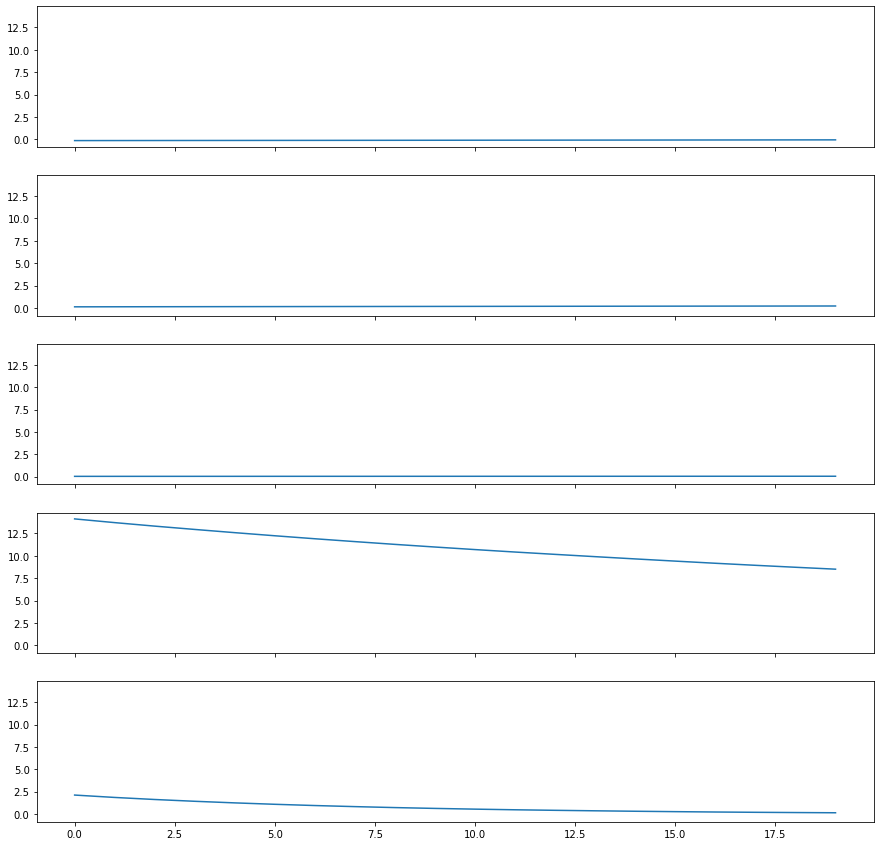

In [73]:
M = 20

figure, axis = plot.subplots(5, 1, sharex = True, figsize = (15, 15), sharey = True)

axis[0].plot(my_sample_correlation(s, v1 + v2, M))
axis[1].plot(my_sample_correlation(s, x1, M))
axis[2].plot(my_sample_correlation(s, x2, M))
axis[3].plot(my_sample_correlation(v1 + v2, x1, M))
axis[4].plot(my_sample_correlation(v1 + v2, x2, M))

# Las primeras estan bien (son cercanas a cero)


What signals are correlated between them? Does it make sense?

<font color = 'blue'>
The first three are basically uncorrelated as they are completely different sources, being the pilots voice, or either of the mics.

Meanwhile the last two comparisons are somewhat correlated since they share the original input (the background noise at each mic), therfore the signals will be similar.

It all indeed makes sense


## 1.6. Implementation of the Wiener filter

We will now use a Wiener filter with the objective of reconstructing the original signal from the noisy ones.



### 1.6.1 Autocorrelation matrix
Extend  `my_sample_correlation` function to also return the autocorrelation matrix of a signal $X$ $(\mathbf{R}_{XX})$ along with the cross correlation between $X$ and $D$ ($\mathbf{r}_{XD}$). 

$$\mathbf{R}_{XX}=  \frac{1}{N_r}\mathbf{X}^T\mathbf{X}$$ 

In [74]:
from locale import D_T_FMT # MATI
import scipy.signal

def my_sample_correlation_wiener(signals, d, M):
  
  N = len(signals[0])
  Nr = N - M + 1
  X = np.zeros((Nr, 0)) # tuple (1 positional arg)

  for x in signals:
  #<SOL>

    # x es la x dentro del for, signals es una tupla (x1, x2)
    Xaux, D = my_matrices(x, d, M)
    X = np.hstack((X, Xaux))

  Rxx = (1/Nr)*(X.T.dot(X)) # autocorrelation of X
  
  rxd = (1/Nr)*(X.T.dot(D)) # cross correlation between X and D (same??)
  # rxd = np.correlate(X, D)
  # rxd = scipy.signal.correlate(X, D)
  
  return Rxx, rxd

  #<\SOL>


### 1.6.2 Obtain the coefficients of the Wiener filter

The coefficients of the Wiener filter can be obtained as the product of the inverse of the autocorrelation of a signal $X$ and the cross correlation among both signals $X$ and $D$:      

$$
\mathbf{w} = \mathbf{R}_{XX}^{-1}\mathbf{r}_{XD}
$$

where:    
*   $X$ is the input signal to the filter
*   $D$ is the reference signal

Define a function (`wiener`) to calculate the coefficients of the Wiener filter.



In [75]:
def wiener(signals, d, M):
  #<SOL>

  Rxx, rxd = my_sample_correlation_wiener(signals, d, M)
  weights = (np.linalg.inv(Rxx)).dot(rxd)
  
  return weights

  #<\SOL>
  

### 1.6.3 Obtain the coefficients of the Wiener filter

Calculate and print the weights learnt by the filter using `M = 5` and both signals $(x_1[n]$ and $x_2[n])$ as the input signal.


In [76]:
M = 5

wwiener_1 = wiener((x1, x2), d, M)

print(wwiener_1)
print(len(wwiener_1))


[-0.55466107 -0.12566862 -0.22717934 -0.31218868  2.18871608  1.66969963
  0.3793561   0.56048081  0.73242077 -3.80803991]
10


How many coefficients have you obtained? Does it make sense?

<font color = 'blue'>

DE BENJA:
Hay un coeficiente para cada columna de X. X tiene columnas por cada input, pone M columnas por cada input

### 1.6.4 Filter and evaluation

Obtain the output of the Wiener filter $y[n]$ for a set of input signals $x_i[n]$:

$${y}[n] = \sum_{i \in 1}^{I}\sum_{m=0}^{M-1}{w}[m+(i-1)M]{x_i[n-m]}$$

Please note that $i \in [1,2]$ in this lab assignment.

After that, compute the error signal of the filter (please note that in this case this error signal is an approximation of the pilot's voice).

$$e[n]={d}[n]-{y}[n] \equiv \widehat{s}[n]$$

where $y[n] = \widehat{v}_1[n]+\widehat{v}_2[n]$.


$\underline{\text{Note}}$:
*    It is not possible to provide an output for the first $M-1$ samples of the input since the filter needs to know the value of the previous $M-1$ samples.
*    To obtain the error, it is necessary to correctly align the original signal and the error of the Wiener filter taking into account that you do not provide an output for the first $M-1$ samples.



In [77]:
def wiener_predict(w, signals):
  #<SOL>

  N = len(signals[0]) # signals es x1 y x2 concatenadas
  Nr = N - M + 1
  X = np.zeros((Nr, 0))

  for x in signals:
    Xaux, D = my_matrices(x, d, M) # x es la x dentro del for, signals es una tupla (x1,x2)
    X = np.hstack((X, Xaux))

  dn = X.dot(w)

  return dn

  #<\SOL>

def wiener_error(w, signals, d):
  #<SOL>

  M = len(w)/len(signals)
  dn = wiener_predict(w, signals)
  e = d[M-1:]-dn
  
  return e

  #<\SOL>


## 1.7 Evaluation of different scenarios

Now, we are going to analyze the effect of using different values of $M$ when the input of the Wiener filter is the signal of a single secondary microphone and in the case in which it is used both of them.







### 1.7.1 First scenario: Secondary mic #1

For this purpose, we will explore different values of $M$ when the input of the Wiener fiter is the secondary mic #1. In particular, we will explore the values $M= 5, 10, 50, 100, 500, 1000, 2000$.

To do so:
*   Obtain the coefficients of the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure both the pilot's voice and the error signal returned by the Wiener filter.

After a certain value of $M$, the error signal of the filter will be an approximation of the pilot's voice.

In [79]:
d_W_1 = {}
d_error_1 = {}
v_M = [5, 10, 50, 100, 500, 1000, 2000]

#<SOL>

for i in v_M:
  d_W_1 = wiener((x1,), d, v_M[i])
  d_error_1[i] = wiener_error(d_W_1, (x1,), d)

#<\SOL>


ValueError: ignored

In [ ]:
#<SOL>




#<\SOL>


What is the most appropriate value of $M$? Would you explore greater values of $M$?

<font color = 'green'> YOUR ANSWER HERE

### 1.7.2. Second scenario: Secondary mic #2

Now, let us analyze the effect of $M$ in the case in which the input of the Wiener filter is the secondary mic #2. As in the first scenario, the values of $M$ that will be explored are: $M= 5, 10, 50, 100, 500, 1000, 2000$.

To do so:
*   Obtain the coefficients of the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure both the pilot's voice and the error signal returned by the Wiener filter.



In [ ]:
d_W_2 = {}
d_error_2 = {}
v_M = [5, 10, 50, 100, 500, 1000, 2000]

#<SOL>




#<\SOL>


In [ ]:
#<SOL>




#<\SOL>


### 1.7.3. Third scenario: Both secondary mics

Now, let us analyze the effect of $M$ in the case in which the input of the Wiener filter are both secondary microphones. As previously, the values of $M$ that will be explored are: $M= 5, 10, 50, 100, 500, 1000, 2000$.

To do so:
*   Obtain the coefficients of the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure, both pilot's voice and the error signal returned by the Wiener filter.


In [ ]:
d_W_3 = {}
d_error_3 = {}
v_M = [5, 10, 50, 100, 500, 1000, 2000]

#<SOL>




#<\SOL>


In [ ]:
#<SOL>




#<\SOL>


For which scenario do you obtain a better estimation of the pilot's voice? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

### 1.7.4. Mean squared error

Compute the mean squared error as a function of $M$. To this end, for every scenario, plot (in the same figure) the mean squared error between the recovery signal and the original signal as a function of $M$.

Note that the filter error is computed as follows:

$$\widehat{s}[n]={d}[n]-{y}[n] = s[n] + v_1[n] + v_2[n] -  \widehat{v}_1[n] - \widehat{v}_2[n] $$

Bearing this in mind, the difference between the filter error and the original pilot's voice will be:

\begin{equation}
\begin{split}
\widehat{s}[n]-s[n] & = s[n] + v_1[n] + v_2[n] -  \widehat{v}_1[n] - \widehat{v}_2[n]  - s[n] \\
& = v_1[n] -  \widehat{v}_1[n] +v_2[n] -  \widehat{v}_2[n]
\end{split}
\end{equation}


$\underline{\text{Note}}$: Use a logarithmic scale range for the plots.



In [ ]:
#<SOL>

# NO USAR EL DE MATI


#<\SOL>


Does the difference between the three scenarios make sense? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE